# CNN

# Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Import Keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
pd.set_option('display.max_columns', None)

# Import base de données

In [6]:
df = pd.read_csv(r'../data/train.csv',delimiter=',', decimal='.')

In [7]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

label = label pour la prediction

42 000 images de 784 colonnes

In [8]:
test = pd.read_csv(r'data/test.csv',delimiter=',', decimal='.')
test

FileNotFoundError: [Errno 2] File data/test.csv does not exist: 'data/test.csv'

In [6]:
(df['label'].value_counts())/len(df)*100

1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64

# Preprocessing

In [9]:
X = df.drop('label', axis=1)
y = df['label']
y = to_categorical(y, num_classes=df['label'].nunique())

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train.shape

(31500, 784)

In [12]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [13]:
#Reshape pou avoir des images en 2D (racine carré de 784 = 28) = les transformer en tensors

X_train = np.array(X_train).reshape((-1, 28, 28, 1))
X_test = np.array(X_test).reshape((-1, 28, 28, 1))

# X_train = X_train.values.reshape((X_train.shape[0], 28, 28, 1))
# X_test = X_test.values.reshape((X_test.shape[0], 28, 28, 1))

In [14]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [15]:
X_train.shape

(31500, 28, 28, 1)

# CNN

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# def define_model():
# 	model = Sequential()
# 	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
# 	model.add(MaxPooling2D((2, 2)))
# 	model.add(Flatten())
# 	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# 	model.add(Dense(10, activation='softmax'))
# 	# compile model
# 	opt = SGD(learning_rate=0.01, momentum=0.9)
# 	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# 	return model

In [17]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(df['label'].nunique(), activation="softmax"))

In [20]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.3)

Epoch 1/30
690/690 [==============================] - 25s 36ms/step - loss: 0.3491 - accuracy: 0.8906 - val_loss: 0.1642 - val_accuracy: 0.9489
Epoch 2/30
690/690 [==============================] - 24s 35ms/step - loss: 0.1025 - accuracy: 0.9676 - val_loss: 0.0895 - val_accuracy: 0.9726
Epoch 3/30
690/690 [==============================] - 25s 36ms/step - loss: 0.0670 - accuracy: 0.9786 - val_loss: 0.0884 - val_accuracy: 0.9733
Epoch 4/30
690/690 [==============================] - 25s 36ms/step - loss: 0.0555 - accuracy: 0.9822 - val_loss: 0.0803 - val_accuracy: 0.9765
Epoch 5/30
690/690 [==============================] - 27s 39ms/step - loss: 0.0425 - accuracy: 0.9859 - val_loss: 0.0709 - val_accuracy: 0.9788
Epoch 6/30
690/690 [==============================] - 24s 35ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0782 - val_accuracy: 0.9774
Epoch 7/30
690/690 [==============================] - 24s 35ms/step - loss: 0.0299 - accuracy: 0.9903 - val_loss: 0.0667 - val_accuracy:

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 20)                1

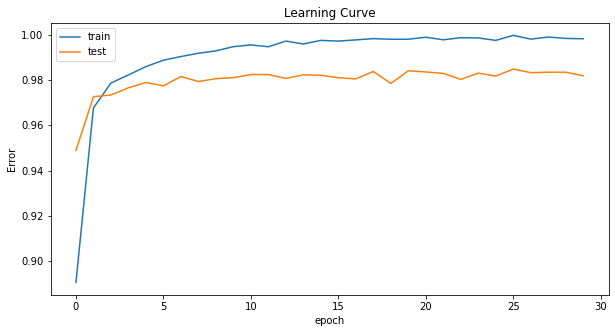

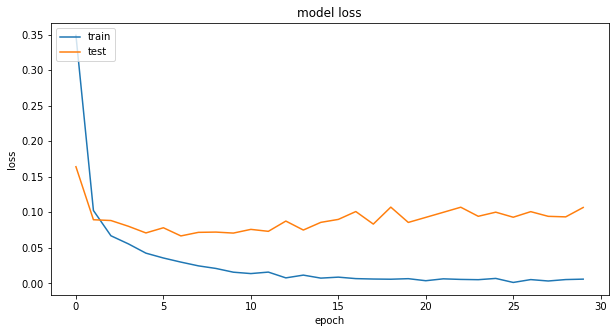

In [23]:
plt.figure(figsize=(10,5))

# summarize history for mae
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Learning Curve')
plt.ylabel('Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# my_pred = model.predict_classes(X_test, batch_size=32, verbose=1) 

# This function were removed in TensorFlow version 2.6. According to the keras in rstudio reference
# update to :
# predict_x=model.predict(X_test) 
# classes_x=np.argmax(predict_x,axis=1)

In [26]:
y_test_one = np.argmax(y_test, axis=1)
#predict output on test set
y_predict = np.argmax(model.predict(X_test), axis=1)
# score
print(classification_report(y_test_one, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1015
           1       0.99      0.99      0.99      1190
           2       0.97      0.99      0.98      1077
           3       0.99      0.97      0.98      1070
           4       0.99      0.97      0.98      1034
           5       0.97      0.99      0.98       930
           6       0.97      1.00      0.98      1044
           7       0.97      0.99      0.98      1129
           8       0.99      0.98      0.98       995
           9       0.99      0.97      0.98      1016

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500



Text(0.5, 15.0, 'Predicted label')

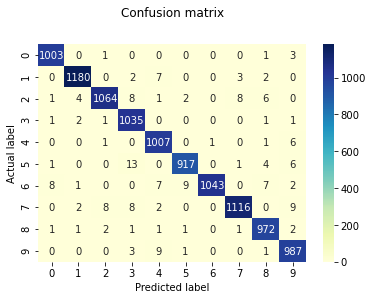

In [27]:
cm = confusion_matrix(y_predict, y_test_one)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 2e iteration : model avec moins de neurones

In [28]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(20, activation='relu'))
model2.add(Dense(df['label'].nunique(), activation="softmax"))

In [31]:
model2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.3)

Epoch 1/30
690/690 [==============================] - 11s 16ms/step - loss: 0.3877 - accuracy: 0.8843 - val_loss: 0.2176 - val_accuracy: 0.9329
Epoch 2/30
690/690 [==============================] - 9s 13ms/step - loss: 0.1367 - accuracy: 0.9599 - val_loss: 0.1370 - val_accuracy: 0.9584
Epoch 3/30
690/690 [==============================] - 9s 13ms/step - loss: 0.0892 - accuracy: 0.9736 - val_loss: 0.1128 - val_accuracy: 0.9675
Epoch 4/30
690/690 [==============================] - 9s 13ms/step - loss: 0.0667 - accuracy: 0.9796 - val_loss: 0.0966 - val_accuracy: 0.9719
Epoch 5/30
690/690 [==============================] - 8s 12ms/step - loss: 0.0524 - accuracy: 0.9853 - val_loss: 0.0933 - val_accuracy: 0.9719
Epoch 6/30
690/690 [==============================] - 8s 12ms/step - loss: 0.0404 - accuracy: 0.9867 - val_loss: 0.0987 - val_accuracy: 0.9725
Epoch 7/30
690/690 [==============================] - 8s 12ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0949 - val_accuracy: 0.972

In [33]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 20)                108180    
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 108,710
Trainable params: 108,710
Non-trainable params: 0
________________________________________________

In [ ]:
plt.figure(figsize=(10,5))

# summarize history for mae
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Learning Curve')
plt.ylabel('Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# test padding

In [35]:
model_test_padding = Sequential()
model_test_padding.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding="same"))
model_test_padding.add(MaxPooling2D(pool_size=(2, 2)))
model_test_padding.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_test_padding.add(MaxPooling2D((2, 2)))
model_test_padding.add(Flatten())
model_test_padding.add(Dense(20, activation='relu'))
model_test_padding.add(Dense(df['label'].nunique(), activation="softmax"))

In [36]:
model_test_padding.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history_test_padding = model_test_padding.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.3)

Epoch 1/5
690/690 [==============================] - 29s 41ms/step - loss: 0.3973 - accuracy: 0.8767 - val_loss: 0.1359 - val_accuracy: 0.9593
Epoch 2/5
690/690 [==============================] - 27s 39ms/step - loss: 0.1079 - accuracy: 0.9683 - val_loss: 0.1023 - val_accuracy: 0.9707
Epoch 3/5
690/690 [==============================] - 27s 39ms/step - loss: 0.0775 - accuracy: 0.9759 - val_loss: 0.0926 - val_accuracy: 0.9728
Epoch 4/5
690/690 [==============================] - 27s 39ms/step - loss: 0.0594 - accuracy: 0.9809 - val_loss: 0.1025 - val_accuracy: 0.9675
Epoch 5/5
690/690 [==============================] - 27s 39ms/step - loss: 0.0504 - accuracy: 0.9839 - val_loss: 0.0720 - val_accuracy: 0.9801


In [38]:
model_test_padding.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_4 (Dense)             (None, 20)               

# Dropout ajouté à model

In [ ]:
model3 = Sequential()
model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(20, activation='relu'))
model3.add(Dense(df['label'].nunique(), activation="softmax"))

# Sauvegarde des modèles 

In [39]:
model.save('models/model')

INFO:tensorflow:Assets written to: models/model\assets


In [46]:
#TEST Chargement d'un modèle
reconstructed_model = tf.keras.models.load_model("models/model")
np.testing.assert_allclose(
    model.predict(X_test), reconstructed_model.predict(X_test)
)
reconstructed_model.fit(X_test, y_test)

329/329 [==============================] - 11s 32ms/step - loss: 0.0741 - accuracy: 0.9853
